## Solutions to Problem Set 2 in "Dynamics: Theory and Applications, Kane and Levinson 1985"

In [1]:
import sympy as sm
import sympy.physics.mechanics as me

In [2]:
me.init_vprinting()

# Problem 2.2

# Solution 1

In [3]:
q1, q2, q3 = me.dynamicsymbols('q1:4')

In [4]:
s1 = sm.sin(q1)
c1 = sm.cos(q1)
s2 = sm.sin(q2)
c2 = sm.cos(q2)
s3 = sm.sin(q3)
c3 = sm.cos(q3)

In [5]:
A = me.ReferenceFrame('A')
B = me.ReferenceFrame('B')

The A frame unit vectors can be written as follows based on the provided table:

In [6]:
ax = c2*c3*B.x + (s1*s2*c3 - s3*c1)*B.y + (c1*s2*c3 + s3*s1)*B.z
ay = c2*s3*B.x + (s1*s2*s3 + c3*c1)*B.y + (c1*s2*s3 - c3*s1)*B.z
az = -s2*B.x + s1*c2*B.y + c1*c2*B.z

Since these are expressed in the B frame, the defintion of angular velocity can be applied to find the angular velocity of A in B.

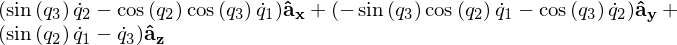

In [7]:
BwA = ay.dt(B).dot(az)*A.x + az.dt(B).dot(ax)*A.y + ax.dt(B).dot(ay)*A.z
BwA.simplify()

In [8]:
AwB = -BwA

$\alpha_2$ is then the $\hat{\mathbf{a}}_y$ measure number.

In [9]:
alpha2 = AwB.dot(A.y)
alpha2.simplify()

In [10]:
bx = c2*c3*A.x + c2*s3*A.y -s2*A.z
by = (s1*s2*c3 - s3*c1)*A.x + (s1*s2*s3 + c3*c1)*A.y + s1*c2*A.z
bz = (c1*s2*c3 + s3*s1)*A.x + (c1*s2*s3 - c3*s1)*A.y + c1*c2*A.z

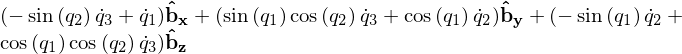

In [11]:
AwB = by.dt(A).dot(bz)*B.x + bz.dt(A).dot(bx)*B.y + bx.dt(A).dot(by)*B.z
AwB.simplify()

In [12]:
beta2 = AwB.dot(B.y)
beta2.simplify()

## Solution 2 (don't use!)

If the table is written verbatim as a matrix, it represents the direction cosine matrix of A relative to B. Meaning we have:

$$
\begin{bmatrix}
  \hat{\mathbf{a}}_1 \\
  \hat{\mathbf{a}}_2 \\
  \hat{\mathbf{a}}_3
\end{bmatrix}
=
^B\mathbf{C}^A
\begin{bmatrix}
  \hat{\mathbf{b}}_1 \\
  \hat{\mathbf{b}}_2 \\
  \hat{\mathbf{b}}_3
\end{bmatrix}
$$

where $^B\mathbf{C}^A$ is the direction cosine matrix of A relative to B.

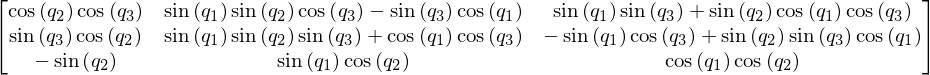

In [13]:
dcm_A_rel_B = sm.Matrix([[c2*c3, s1*s2*c3 - s3*c1, c1*s2*c3 + s3*s1],
                         [c2*s3, s1*s2*s3 + c3*c1, c1*s2*s3 - c3*s1],
                         [-s2,   s1*c2,            c1*c2]])
dcm_A_rel_B

B can be oriented with respect to A by using this direction cosine matrix, but it to do so you provide the DCM of A relative to B.

In [14]:
A = me.ReferenceFrame('A')
B = me.ReferenceFrame('B')
B.orient(A, 'DCM', dcm_A_rel_B)

The `.dcm()` method returns the direction cosine matrix of B relative to A. Note that this is the transpose of the provided DCM.

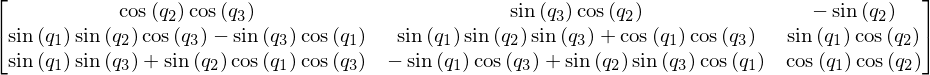

In [15]:
B.dcm(A)

You can get back the original DCM with the following, which is the DCM of A relative to B.

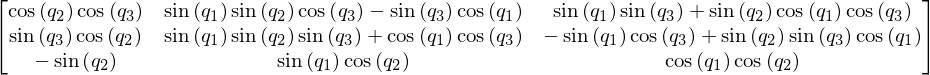

In [16]:
A.dcm(B)

Once that is set, the angular velocity of B in A can be calculated.

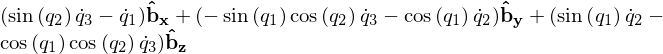

In [17]:
AwB = B.ang_vel_in(A)
AwB

Once the angular velocity vector is available, getting the measure numbers are a couple of dot products away:

In [18]:
alpha2 = AwB.dot(A.y)
alpha2.simplify()

In [19]:
beta2 = AwB.dot(B.y)
beta2.simplify()

The sign of these vectors is opposite that of the book. This is a bug that was introduced in SymPy 1.3. It was fixed for SymPy 1.5 here: https://github.com/sympy/sympy/pull/16828 so don't use this method until SymPy 1.5 is out (or use SymPy < 1.3).

# Problem 2.3

In [20]:
A = me.ReferenceFrame('A')
B = A.orientnew('B', 'Axis', (q1, A.x))
C = B.orientnew('C', 'Axis', (q2, B.y))
D = C.orientnew('D', 'Axis', (q3, C.z))

Using the definition:

In [21]:
DwB = B.y.dt(D).dot(B.z)*B.x + B.z.dt(D).dot(B.x)*B.y + B.x.dt(D).dot(B.y)*B.z
DwB.simplify()

Gives same result as:

In [22]:
DwB = B.ang_vel_in(D).express(B)
DwB

Verify that the sum of the two angular velocities also gives the same result:

In [23]:
DwC = C.ang_vel_in(D)
CwB = B.ang_acc_in(C)

In [24]:
(DwC + CwB).express(B)

Finally, calculate the D measure numbers of the angular velocity of D in A.

In [25]:
AwD = D.ang_vel_in(A)

In [26]:
AwD.dot(D.x)

In [27]:
AwD.dot(D.y)

In [28]:
AwD.dot(D.z)

# Problem 2.7

In [29]:
q1, q2, q3 = me.dynamicsymbols('q1:4')

In [30]:
A = me.ReferenceFrame('A')
Y = me.ReferenceFrame('Y')  # intermediate frame so that simple rotations can be used
B = me.ReferenceFrame('B')
C = me.ReferenceFrame('C')

In [31]:
Y.orient(A, 'Axis', (q1, A.z))
B.orient(Y, 'Axis', (sm.pi/2 - q2, Y.x))
C.orient(B, 'Axis', (q3, B.z))

In [32]:
C.ang_vel_in(A)

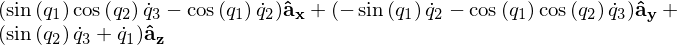

In [33]:
C.ang_vel_in(A).express(A)

Note that in each measure number that the time derivatives are linear terms.

In [34]:
ux, uy, uz = me.dynamicsymbols('u_x, u_y, u_z')

You can form three equations that are linear in the q dots like so:

In [35]:
eq1 = sm.Eq(ux, C.ang_vel_in(A).dot(A.x))
eq1

In [36]:
eq2 = sm.Eq(uy, C.ang_vel_in(A).dot(A.y))
eq2

In [37]:
eq3 = sm.Eq(uz, C.ang_vel_in(A).dot(A.z))
eq3

Then you can solve these equations for the q dots:

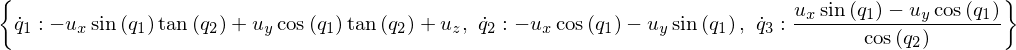

In [38]:
sm.solve((eq1, eq2, eq3), q1.diff(), q2.diff(), q3.diff())

Same with the second set, but here I used a matrix form where you provide the expressions that equate to zero.

In [39]:
u1, u2, u3 = me.dynamicsymbols('u1:4')

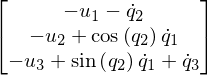

In [40]:
zeros = C.ang_vel_in(A).to_matrix(B) - sm.Matrix([u1, u2, u3])
zeros

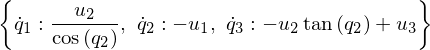

In [41]:
sm.solve(zeros, q1.diff(), q2.diff(), q3.diff())

# Problem 2.8

In [42]:
B.ang_vel_in(A).express(B)

In [43]:
C.ang_vel_in(A).express(B)

The first two measure numbers are the same and the third can be formed by:

In [44]:
q1dot = u2/sm.cos(q2)

In [45]:
sm.trigsimp(sm.sin(q2)*q1dot)

# Problem 2.10

In [46]:
q1, q2, q3 = me.dynamicsymbols('q1:4')
ux, uy, uz = me.dynamicsymbols('u_x, u_y, u_z')
u1, u2, u3 = me.dynamicsymbols('u1:4')

In [47]:
A = me.ReferenceFrame('A')
Y = me.ReferenceFrame('Y')  # intermediate frame so that simple rotations can be used
B = me.ReferenceFrame('B')
C = me.ReferenceFrame('C')

In [48]:
Y.orient(A, 'Axis', (q1, A.z))
B.orient(Y, 'Axis', (sm.pi/2 - q2, Y.x))
C.orient(B, 'Axis', (q3, B.z))

In [49]:
C.set_ang_vel(A, ux*A.x + uy*A.y + uz*A.z)

In [50]:
C.ang_vel_in(A)

In [51]:
C.ang_acc_in(A)

In [52]:
C.set_ang_vel(A, u1*B.x + u2*B.y + u3*B.z)

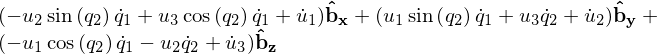

In [53]:
C.ang_acc_in(A).express(B).simplify()

Notice that there are time derivatives of the q's present in the expression. We need to elimate them. You can do so with the solutions to Prob. 2.7.

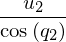

In [54]:
# uses zeros calculated in previous problem
sol = sm.solve(zeros, q1.diff(), q2.diff(), q3.diff())
sol[q1.diff()]

In [55]:
C.ang_acc_in(A).express(B).subs(sol).simplify()

This process of substituting the results of the kinematical differential equations will be useful for developing you models as we move forward.

# Problem 2.11

In [56]:
L = me.ReferenceFrame('L')  # The laboratory frame
C = me.ReferenceFrame('C')  # The disc frame
R = me.ReferenceFrame('R')  # The rod frame
q1, q2 = me.dynamicsymbols('q1, q2')
r = sm.symbols('r', real=True)
C.orient(L, 'Axis', (q1, L.x))
R.orient(C, 'Axis', (q2, C.y))

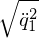

In [57]:
C.ang_acc_in(L).magnitude()

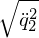

In [58]:
R.ang_acc_in(C).magnitude()

Note that these two do not reduce to the simplest form. This is because SymPy treats the q's as complex valued symbols by default. There doesn't seem to be a simple way to fix this. I'm checking on that.

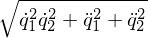

In [59]:
R.ang_acc_in(L).magnitude()